<a href="https://colab.research.google.com/github/nikeshkumar7/colab/blob/main/Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
base_dir = '/content/COVID'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
# Directory with our training positive pictures
train_P_dir = os.path.join(train_dir, 'P')
# Directory with our training negative pictures
train_N_dir = os.path.join(train_dir, 'N')
# Directory with our validation cat pictures
validation_P_dir = os.path.join(validation_dir, 'P')
# Directory with our validation dog pictures
validation_N_dir = os.path.join(validation_dir, 'N')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
np.random.seed(1000)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
batch_size = 128
img_height = 227
img_width = 227

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
validation_split=0.2,
subset="training",
seed=1000,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 12 files belonging to 3 classes.
Using 10 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
validation_dir,
validation_split=0.2,
subset="validation",
seed=1000,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 6 files belonging to 3 classes.
Using 1 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['.ipynb_checkpoints', 'N', 'P']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 227, 227, 3)
(10,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.1/
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )
val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

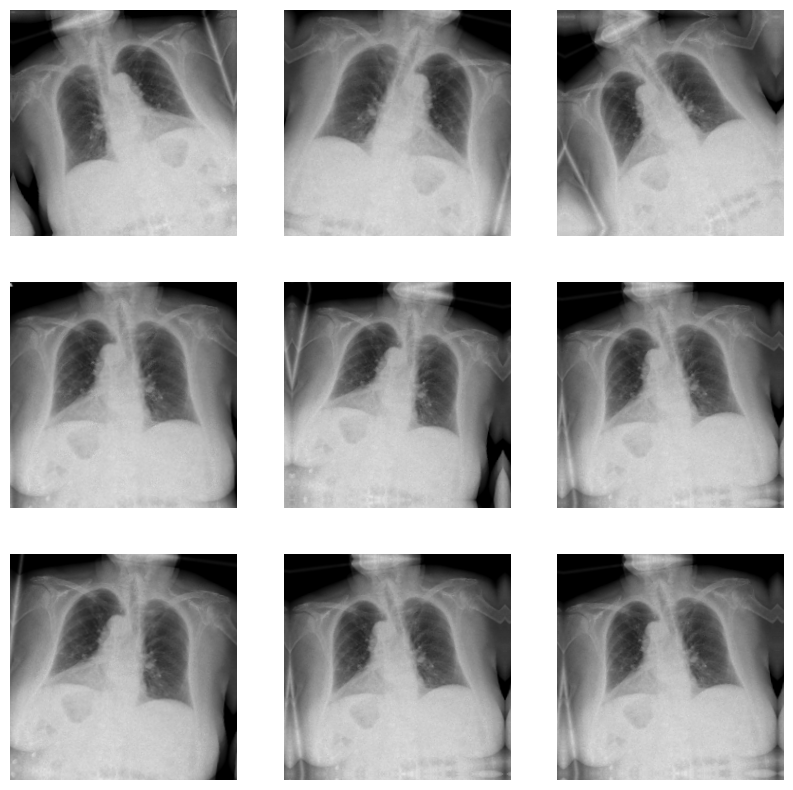

In [ ]:
data_augmentation = keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal",
  input_shape=(img_height,img_width,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
])
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")